In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%pprint off
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'

Pretty printing has been turned OFF


In [2]:
def rearrange_col(dataframe, col_to_move, reference_col, right=True):
    col_list = dataframe.columns.values.tolist()
    col_list2 = [x for x in col_list if x != col_to_move]
    reference_idx = col_list2.index(reference_col)
    if right==True:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.append(col_to_move)
        return dataframe[col_list3]
    else:
        col_list3 = []
        for y in col_list2:
            col_list3.append(y)
            if y == reference_col:
                col_list3.insert(-2, col_to_move)
        return  dataframe[col_list3]

In [3]:
fpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results/results_clean_0813.csv'

In [18]:
#### PART1: CALCULATE SUBJECT-TO-GROUP CORRELATION PER HIT
res = pd.read_csv(fpath, converters={'response': eval, 'RT': eval, 'buttonpress': eval, 'catch_response': eval})
#res.sort_values(by=['stim_id', 'id'], inplace=True)
print('before catch-based rejection:', res.shape)
res.tail()

######################### check number of responses per lemma
# for i in set(res['stim_id']): 
#     df = res.loc[res['stim_id']==i]
#     print (i, df.iloc[1,].stim, df.shape[0])

########################## convert N/A to 0 
res['catch_response_upd'] = res['catch_response'].apply(lambda x: [int(0) if i=='7' else int(i) for i in x])
res['response_upd'] = res['response'].apply(lambda x: [int(0) if i=='7' else int(i) for i in x])

res = rearrange_col(res, 'catch_response_upd', 'catch_response')
res = rearrange_col(res, 'response_upd', 'response')
res

res.drop(columns=['catch_response', 'response'], inplace=True)
res.rename(columns={'response_upd': 'response', 'catch_response_upd':'catch_response'}, inplace=True)

######################### drop bad subjects
res = res.loc[res['badsubject']=='N', ]
print ('after catch-based rejection:', res.shape)
res.head()

before catch-based rejection: (4335, 20)
after catch-based rejection: (3802, 20)


,id,stim_id,stim,subject_id,response,start,end,RT,buttonpress,turkcode,subject_num,gender,age,education,occupation,results_id,catch_subject_id,catch_response,correctN,badsubject
0,1,159,laugh,1,"[1, 0, 0, 3, 0, 0, 1, 5, 6, 2, 3, 3, 6, 2, 0, ...",2021-05-25 16:26:41,2021-05-25 16:35:15,"[10451, 2940, 2319, 3999, 2779, 3110, 6525, 75...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, ...",8545510,A3I9XLIHPPWPN1,f,57,18.0,Dataanalystadministrationassistant,1,1,"[0, 6, 0, 6, 6]",4,N
1,2,295,see,2,"[6, 3, 0, 1, 1, 2, 0, 4, 0, 1, 0, 3, 3, 0, 0, ...",2021-05-25 16:29:38,2021-05-25 16:36:24,"[4024, 9148, 2726, 5130, 5199, 3487, 2790, 432...","[1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2727964,A2CWJRAEFZ44HU,m,36,14.0,nursingassistantihelpoutpatientsandstaffinahos...,2,2,"[0, 6, 0, 6, 6]",4,N
2,3,214,flatten,3,"[3, 0, 0, 0, 5, 3, 1, 1, 3, 2, 0, 5, 0, 1, 4, ...",2021-05-25 16:26:58,2021-05-25 16:36:47,"[4432, 2912, 2592, 3640, 7976, 6904, 5368, 608...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3205581,A7ERZELTAMWL5,m,70,18.0,PatrolofficerIridearoundaresidentialcomplextoc...,3,3,"[0, 6, 0, 6, 6]",4,N
4,5,262,calm,5,"[4, 0, 0, 0, 3, 0, 0, 1, 4, 0, 5, 0, 4, 2, 2, ...",2021-05-25 16:28:07,2021-05-25 16:38:09,"[4142, 2349, 7257, 8933, 4802, 3372, 3349, 830...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, ...",1247441,A2LF84L3K71GR2,f,38,12.0,RestaurantSupervisor,5,5,"[0, 6, 0, 6, 6]",4,N
5,6,7,jump,6,"[3, 0, 0, 0, 0, 1, 0, 3, 6, 3, 0, 0, 0, 6, 0, ...",2021-05-25 16:29:58,2021-05-25 16:45:19,"[9500, 3180, 3371, 90941, 4762, 8544, 6685, 40...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",8286749,A1VSHM4NLZ705D,m,41,12.0,retail,6,6,"[0, 6, 0, 6, 6]",4,N


In [ ]:
#### extract "live" responses
# live = res.loc[res['stim_id']==1]

# response_n = len(res.iloc[0]["response"])
# column = []
# for i in range(1, response_n+1):
#     column.append('q'+str(i))  ##### column = ['q1', 'q2', ... 'q72']

# live_responses = pd.DataFrame(live.response.tolist(), columns=column).astype(int)

# savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
# live_responses.to_csv(savepath+ '/live_reponses.csv', index=None)

In [43]:
#################### create an average dict ###################### 
del avg_df
stim_id_n = len(set(res['stim_id']))  ###i.e., 320

response_n = len(res.iloc[0]["response"])
column = []
for i in range(1, response_n+1):
    column.append('q'+str(i))  ##### column = ['q1', 'q2', ... 'q72']

avg_dict = {}
for i in range(1, stim_id_n+1):
    df = res.loc[res['stim_id']==i, ]
    df_responses = pd.DataFrame(df.response.tolist(), columns=column).astype(int)
    avg = list(df_responses.mean())
    avg = [round(i,3) for i in avg]
#     print (df.shape)
#     print (df_responses.shape)

    avg_dict[i] = {'stim': df.iloc[0]['stim'], 'subject_ids': df['subject_id'].values.tolist(), 
                  'response_N': df.shape[0], 'avg_rating': avg}
avg_df = pd.DataFrame.from_dict(avg_dict, orient='index')

In [49]:
# avg_df[avg_df['stim']=='affect']['avg_rating'].tolist()
# for k, v in avg_dict.items():
#     print (v['stim'], v['response_N'])
res.shape

(3802, 20)

In [51]:
res.tail()

,id,stim_id,stim,subject_id,response,start,end,RT,buttonpress,turkcode,subject_num,gender,age,education,occupation,results_id,catch_subject_id,catch_response,correctN,badsubject
4329,4330,114,build,1292,"[6, 0, 0, 3, 4, 0, 1, 6, 5, 2, 3, 6, 0, 0, 1, ...",2021-08-12 22:53:52,2021-08-12 23:02:54,"[4871, 7642, 3484, 6609, 7112, 5096, 9510, 492...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",5192660,A1ZVJG3BKYHJWN,f,65,14,retailstorecashier,3776,1292,"[0, 6, 0, 6, 6]",4,N
4330,4331,103,shorten,1293,"[5, 5, 5, 5, 5, 6, 4, 6, 6, 5, 4, 3, 4, 4, 4, ...",2021-08-12 23:06:49,2021-08-12 23:40:48,"[667924, 14420, 20586, 4278, 2270, 6312, 9264,...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2285767,APG9EK6P41THO,m,48,16,NaN,3777,1293,"[0, 6, 0, 6, 6]",4,N
4331,4332,243,discover,1294,"[3, 5, 4, 5, 4, 5, 4, 4, 5, 4, 5, 5, 4, 5, 5, ...",2021-08-12 23:37:43,2021-08-12 23:47:34,"[1992, 1873, 1567, 3326, 2023, 3199, 1328, 270...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1553234,A4SQSL2ZCEU1,f,48,3,15,3778,1294,"[4, 6, 0, 6, 6]",4,N
4333,4334,198,decrease,210,"[0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 5, 0, 4, 1, ...",2021-08-13 03:32:09,2021-08-13 03:37:55,"[1976, 4112, 2681, 2408, 2120, 7560, 8361, 344...","[1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, ...",8451568,A2LV5432PV1S39,m,34,16,DeputyCourtClerk,3780,210,"[0, 6, 0, 6, 6]",4,N
4334,4335,190,suffocate,354,"[2, 0, 1, 3, 0, 0, 0, 3, 3, 3, 2, 0, 3, 4, 3, ...",2021-08-12 12:43:47,2021-08-13 10:28:09,"[10243, 6059, 10749, 7117, 21965, 5991, 5651, ...","[1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, ...",2647805,APZQ9ADUXTS7N,f,66,14,NaN,3781,354,"[0, 6, 0, 6, 6]",4,N


In [67]:
########calculate intersubject correlation and update res
from scipy.stats.stats import pearsonr

res_dict = res.set_index('id').to_dict(orient='index')
for k, v in res_dict.items():
    response = v['response']
    check = v['stim'] == avg_dict[v['stim_id']]['stim']
    if check == False:
        print ('something wrong!')
    group_response = avg_dict[v['stim_id']]['avg_rating']
    v['corr'] = round(pearsonr(response, group_response)[0],3) ###correlation b/w this vector and group average vector for word X.
    v['corr_fisher'] = np.arctanh(v['corr'])
#pearsonr(response, group_response)[0]

### convert res_dict to df
res_upd = pd.DataFrame.from_dict(res_dict, orient='index')


### write res_upd to csv 
res_upd.to_csv(savepath + '/HITs_clean_with_correlations_0813.csv', index=False) ### clean HITs after dropping catch-failed HITs

# min(res_upd['corr_fisher'].values.tolist())
# res_upd2= res_upd.drop(columns=["RT", "buttonpress","turkcode","subject_num", "catch_subject_id","occupation"])
# res_upd2.loc[res_upd['badsubject']=='Y', ].sort_values(by='corr')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b193df690>],
      dtype=object)

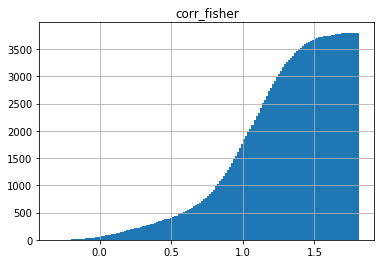

In [74]:
###### plot histogram
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
res_upd.hist(column='corr_fisher', cumulative=True, bins=150, ax=ax)
#fig.savefig(savepath+'/subj_to_group_corr_hist.png')

In [ ]:
###### Part 2: find out bad words
quesf = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/stimuli/questions.txt'
ques = pd.read_csv(quesf, delimiter='\t', header=None).iloc[:, :2].rename(columns={0:'fname', 1:'question'})
q_dict = ques.to_dict(orient='index')

#find only "verb" features
new_q = ques.iloc[67:,]₩ㅁ
caused = ques.loc[ques['fname']=='Caused',]

verb_ques = pd.concat([caused, new_q])

In [ ]:
verb_ques

In [ ]:
q_dict[46]['fname']

In [ ]:
## export data (for each verb, one response for each feature)

res_sub = res_upd[["stim_id", "stim", "subject_id", "response","correctN","corr_fisher"]]

new_column= list(range(response_n)) #[0,1,2,...71]
res_sub[new_column] = pd.DataFrame(res_sub.response.tolist(), index= res_sub.index)
res_sub = res_sub[["stim_id", "stim", "subject_id", "correctN", "corr_fisher", 46, 67, 68, 69, 70, 71]]

d = dict()
for i in [46,67,68,69,70,71]:
    d[i] = q_dict[i]['fname']

res_sub = res_sub.rename(columns=d)
res_sub.head()

##export res_sub
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
res_sub.to_csv(savepath+'/clean_5features_individual.csv', index=False)

#df2[['team1','team2']] = pd.DataFrame(df2.teams.tolist(), index= df2.index)
#to_add = pd.DataFrame(res_sub.response.tolist()).iloc[:, [46,67,68,69,70,71]]
#pd.DataFrame(res_sub.response.tolist())
#df2[['team1','team2']] = pd.DataFrame(df2.teams.tolist(), index= df2.index)
#df_responses = pd.DataFrame(df.response.tolist(), columns=column).astype(int)

In [ ]:
#########PART3: integrate SD dataframe with verblist
sdpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results/SD_by_word_and_feature.csv'
listpath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/Verblists/List320.csv'

df_sd = pd.read_csv(sdpath, index_col=0)
df_list = pd.read_csv(listpath)
df_list = df_list.loc[df_list['in']==1]

###merge of verblist 
df_sd_upd = pd.merge(left=df_sd, right=df_list, left_on= 'word', right_on='Lemma')

#### clean up merged df
df_sd_upd.drop(columns=['Lemma', 'badverb', 'GrandIndex', 'in', 'whyexcluded', 
                        'abs_marginality', 'rel_marginality', 'SynClassLitrt', 'SynClassSK', 'good'], inplace=True)


#### add <mean (subject-to-group) correlation to df_sd_upd ##### 
corr_raw = pd.read_csv(savepath + '/HITs_clean_with_correlations.csv')
corr_raw = corr_raw[["stim_id", "stim", "subject_id", "corr_fisher"]]
corr_raw['corr_fisher'] = corr_raw['corr_fisher'].round(decimals=3)
corr_dict = {}
for i in range(1,321):
    df_sel = corr_raw.loc[corr_raw['stim_id']==i]
    stim_id = df_sel.iloc[0]['stim_id']
    word = df_sel.iloc[0]['stim']
    corr_list = df_sel['corr_fisher'].values.tolist()
    corr_list.sort(reverse=True)
    corr_list = [round(c,2) for c in corr_list]
    mean_corr = round(df_sel['corr_fisher'].mean(), 2)
    d_add = {'stim_id': stim_id, 'word': word, 'corr_list':corr_list, 'mean_fcorr':mean_corr}
    corr_dict[i] = d_add
    
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index')


df_sd_out = pd.merge(left=df_sd_upd, right=corr_df, on='word')
df_sd_out = rearrange_col(df_sd_out, 'mean_fcorr', 'meanSD')
df_sd_out = rearrange_col(df_sd_out, 'corr_list', 'mean_fcorr')
######

### write to csv
savepath = '/Users/songkim/GoogleDrive/Primary/Projects/VerbVector/AMT/html/experiments/ratings2/results'
df_sd_out.to_csv(savepath + '/list320_with_sd_correlation.csv', index=False)


## plotting
#df_sd_out.plot(x="stim_id", y=["mean_fcorr"], kind="hist")
df_sd_out.plot(y=["mean_fcorr"], kind="hist")
df_sd_out.plot(y=["meanSD"], kind="hist")

df_sd_out.plot(x="SynClass", y="mean_fcorr", kind="scatter")

In [ ]:
df_sd_out.head()

In [ ]:
df_sd_upd.head()

In [ ]:
corr_df.head()

In [ ]:
df_sd_upd.head()

In [ ]:
i=1
df = corr_raw.loc[corr_raw['stim_id']==i]
corr_list = df['corr_fisher'].values.tolist()
corr_list = [round(c,2) for c in corr_list]
mean_corr = round(df['corr_fisher'].mean(), 3)

In [ ]:
df

In [ ]:
corr_raw.loc[corr_raw['stim_id']==1]['corr_fisher'].mean()

In [ ]:
corr_raw.loc[corr_raw['stim_id']==1]['corr_fisher'].values.tolist()

In [ ]:
df_sd_upd.head()

In [ ]:
## add "mean (subject-to-group) correlation"
df_sd_upd['meanCorrelation']


In [ ]:
df_sd_upd.head()

In [ ]:
df_sd_upd.head()

In [ ]:
df_sd.head()

In [ ]:
#df_sd_upd['word'].equals(df_sd_upd['Lemma'])
set(df_sd_upd['in'].values.tolist())
#df['Score A'].equals(df['Score B'])

In [ ]:
# list_1 = [1, 1, 1, 1]
# list_2 = [-1, -1, -1, -1]
# list_3 = [1, 3, 5, 7]
# list_4 = [0,0,0,100]
# dfx=pd.DataFrame({"list_1":list_1,"list_2":list_2,"list_3":list_3,"list_4":list_4})
# dfx

In [ ]:
# t1= '0_6_0_6_6'
# t1.split('_')

# testlist = ['5', '7', '3', '0', '6', '0', '3', '1', '0']
# ['0' if t=='7' else t for t in testlist]
#new_prices = [round(price - (price * 10 / 100), 2) if price > 50 else price for price in prices]

In [ ]:
####### spread responses into separate columns
# df_test = res[["id", "stim_id", "response"]]

#print ('before spreading:', res.shape)

# response_n = len(res.iloc[0]["response"])
# column = []
# for i in range(1, response_n+1):
#     column.append('q'+str(i))  ##### column = ['q1', 'q2', ... 'q72']

# res[column] = pd.DataFrame(res.response.tolist(), index=res.index)

# print ('after spreading:', res.shape)

#res.tail()

#df2[['team1','team2']] = pd.DataFrame(df2.teams.tolist(), index= df2.index)

In [ ]:
# for r in range(len(res_upd.iloc[0]['response'])):
#     print (r, res_upd.iloc[0]['response'][r])

In [ ]:
#np.arctanh(0.767)

# from scipy.stats import zprob
# def z_transform(r, n):
#     z = np.log((1 + r) / (1 - r)) * (np.sqrt(n - 3) / 2)
#     p = zprob(-z)
#     return p